In [23]:
import pandas as pd
import numpy as np

In [24]:
reviews_df = pd.read_csv("../data/reviews.csv")

1. Drop any duplicate reviews
3. Calculate the weight so that 1 is the max, 0 is the min
3. Scale the suggestedPlayerCount scale to be between 0 and 1
2. Remove games that do not have enough reviews
2. Remove users that have not reviewed enough games


In [25]:
reviews_df.head()

,source_type,source_id,edge_type,target_type,target_id,rating,comment
0,Person,abbojm02,hasReviewed,Game,161936.0,10.0,Because all the people will be so mad.
1,Person,abbojm03,hasReviewed,Game,161936.0,10.0,Played this game more times than any other one...
2,Person,abbojm05,hasReviewed,Game,161936.0,10.0,Haters gonna hate.
3,Person,0Allegiance,hasReviewed,Game,174430.0,8.5,Excellent game. Balancing issues with some cha...
4,Person,37crows,hasReviewed,Game,174430.0,10.0,"Simply my favorite game, outstanding design."


In [26]:
print("Before dropping duplicates:",len(reviews_df))
reviews_df = reviews_df.drop_duplicates(subset=["source_id", "target_id"], keep='last')
print("After dropping duplicates:",len(reviews_df))

Before dropping duplicates: 1876929
After dropping duplicates: 1800606


In [27]:
reviews_df['weight'] = reviews_df.groupby("source_id")['rating'].transform( lambda x:  (x - np.min(x))/(np.max(x) - np.min(x)) if (np.max(x) - np.min(x)) > 1 else 0.5 )

In [28]:
counts_col_user = reviews_df.groupby("source_id")["source_id"].transform(len)
counts_col_games = reviews_df.groupby("target_id")["target_id"].transform(len)

In [29]:
counts_col_games.describe()

count    1.800606e+06
mean     6.335332e+02
std      8.048704e+02
min      1.000000e+00
25%      7.300000e+01
50%      2.920000e+02
75%      9.070000e+02
max      4.272000e+03
Name: target_id, dtype: float64

In [30]:
counts_col_user.describe()

count    1.800606e+06
mean     7.120851e+02
std      8.920498e+02
min      1.000000e+00
25%      2.320000e+02
50%      4.750000e+02
75%      8.750000e+02
max      8.955000e+03
Name: source_id, dtype: float64

In [31]:
k_user, k_game = 200, 300
k_max_user = 600
mask_user = counts_col_user >= k_user
mask_movies = counts_col_games >= k_game
mask_max_user = counts_col_user <= k_max_user

In [32]:
print(f"Number of ratings before: {reviews_df.shape[0]}")
print(f"Number of games: {len(reviews_df['target_id'].unique())}" )
print(f"Number of users: {len(reviews_df['source_id'].unique())}" )
reviews_df_masked = reviews_df[mask_user & mask_movies & mask_max_user]
print(f"Number of ratings after: {reviews_df_masked.shape[0]}")
print(f"Number of games: {len(reviews_df_masked['target_id'].unique())}" )
print(f"Number of users: {len(reviews_df_masked['source_id'].unique())}" )

reviews_df_masked.head(5)

Number of ratings before: 1800606
Number of games: 60975
Number of users: 8215
Number of ratings after: 373166
Number of games: 1179
Number of users: 2003


,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
749,Person,2bit,hasReviewed,Game,17405.0,8.0,Objectively I'd rate this an 8. Excellent pro...,0.777778
753,Person,2bit,hasReviewed,Game,68448.0,7.5,NaN,0.722222
754,Person,2bit,hasReviewed,Game,173346.0,7.0,NaN,0.666667
755,Person,2bit,hasReviewed,Game,180263.0,7.5,"Fun, but spoilt by the fact that the success a...",0.722222
756,Person,2bit,hasReviewed,Game,172818.0,7.5,NaN,0.722222


<Axes: >

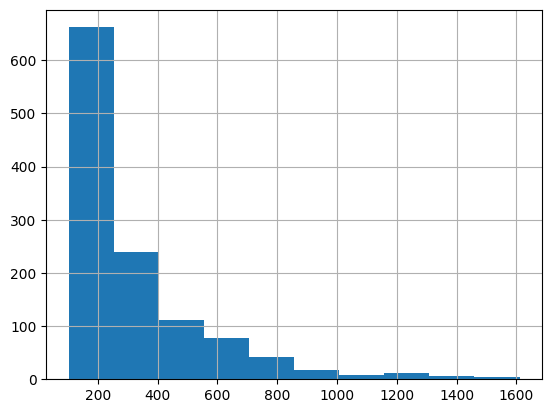

In [33]:
reviews_df_masked['target_id'].value_counts().hist()

<Axes: >

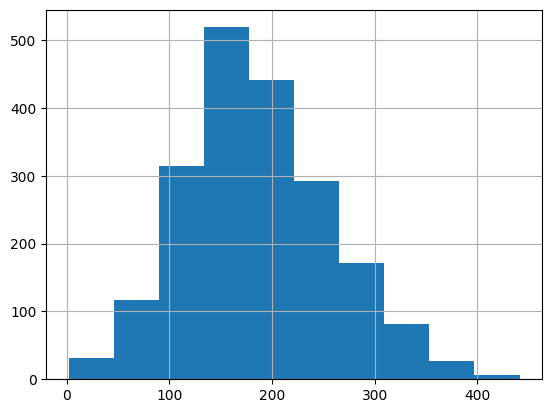

In [34]:
reviews_df_masked['source_id'].value_counts().hist()

In [35]:
reviews_df_masked

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
749,Person,2bit,hasReviewed,Game,17405.0,8.0,Objectively I'd rate this an 8. Excellent pro...,0.777778
753,Person,2bit,hasReviewed,Game,68448.0,7.5,NaN,0.722222
754,Person,2bit,hasReviewed,Game,173346.0,7.0,NaN,0.666667
755,Person,2bit,hasReviewed,Game,180263.0,7.5,"Fun, but spoilt by the fact that the success a...",0.722222
756,Person,2bit,hasReviewed,Game,172818.0,7.5,NaN,0.722222
...,...,...,...,...,...,...,...,...
1646694,Person,BakeliteTM,hasReviewed,Game,1465.0,7.0,NaN,0.571429
1646695,Person,BakeliteTM,hasReviewed,Game,43528.0,9.0,NaN,0.857143
1646700,Person,BakeliteTM,hasReviewed,Game,22345.0,6.0,"There's a game here, but a boring one. Played ...",0.428571
1646701,Person,BakeliteTM,hasReviewed,Game,6830.0,10.0,NaN,1.000000


In [36]:
game_ids_to_keep = reviews_df_masked['target_id'].unique()

In [37]:
len(game_ids_to_keep)

1179

In [38]:
game_info = pd.read_csv("../data/game_info.csv")

In [39]:
game_info.head(1)

,id,rank,name,short_description,avg_rating,num_ratings,thumbnail_url,long_description,complexity_socre,year_published,image_url,min_play_time,max_play_time,expected_play_time
0,224517,1,Brass: Birmingham,"Build networks, grow industries, and navigate ...",8.62,37652,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,Brass: Birmingham is an economic strategy game...,3.8978,2018.0,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,60.0,120.0,120.0


In [40]:
game_info_masked = game_info[game_info['id'].isin(game_ids_to_keep)]

In [41]:
games_with_info = game_info_masked['id'].unique()

In [42]:
reviews_df_masked = reviews_df_masked[reviews_df_masked['target_id'].isin(games_with_info)]

In [43]:
reviews_df_masked.sort_values(by='weight', ascending=True)

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
990726,Person,CmdrSunshine,hasReviewed,Game,10547.0,1.0,NaN,0.0
1524069,Person,blelliott01,hasReviewed,Game,193042.0,5.0,NaN,0.0
1524054,Person,blelliott01,hasReviewed,Game,98778.0,5.0,NaN,0.0
1524040,Person,blelliott01,hasReviewed,Game,37904.0,5.0,NaN,0.0
981070,Person,Dodb66,hasReviewed,Game,244992.0,2.0,"played it once, hope to never play it again",0.0
...,...,...,...,...,...,...,...,...
1430387,Person,aldwin160,hasReviewed,Game,317985.0,10.0,NaN,1.0
1430378,Person,aldwin160,hasReviewed,Game,230802.0,10.0,NaN,1.0
1430364,Person,aldwin160,hasReviewed,Game,432.0,10.0,NaN,1.0
1576806,Person,Aneken,hasReviewed,Game,36218.0,10.0,NaN,1.0


In [45]:
reviews_df_masked[reviews_df_masked['source_id']=='Evil_Edith'].sort_values(by='weight')

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
1256918,Person,Evil_Edith,hasReviewed,Game,140.0,6.0,3 - 8\n$1,0.2
1256766,Person,Evil_Edith,hasReviewed,Game,526.0,7.0,2\n$6,0.4
1256855,Person,Evil_Edith,hasReviewed,Game,155969.0,7.0,2 - 4\n$5,0.4
1256872,Person,Evil_Edith,hasReviewed,Game,394.0,7.0,2\n$5,0.4
1256993,Person,Evil_Edith,hasReviewed,Game,1465.0,7.0,3 - 6\n$4,0.4
...,...,...,...,...,...,...,...,...
1256932,Person,Evil_Edith,hasReviewed,Game,131260.0,8.0,3 - 5\n$17,0.6
1256940,Person,Evil_Edith,hasReviewed,Game,166669.0,8.0,3 - 4 \n$12,0.6
1256912,Person,Evil_Edith,hasReviewed,Game,260428.0,8.0,1 - 5\n$31,0.6
1256884,Person,Evil_Edith,hasReviewed,Game,110327.0,8.0,2 - 5\n$25,0.6


In [61]:
graph_df = pd.read_csv("../data/graph.csv")
graph_df.head(6)

,game_id,target,target_type,edge_type,weight
0,224517,Economic,Category,hasCategory,1.0
1,224517,Industry / Manufacturing,Category,hasCategory,1.0
2,224517,Post-Napoleonic,Category,hasCategory,1.0
3,224517,Trains,Category,hasCategory,1.0
4,224517,Transportation,Category,hasCategory,1.0
5,224517,Hand Management,Mechanic,hasMechanic,1.0


In [67]:
graph_df.loc[graph_df['target_type']=='playerCount', 'weight'] = graph_df[graph_df['target_type']=='playerCount'].groupby("game_id")['weight'].transform( lambda x: (x - np.min(x))/(np.max(x) - np.min(x)) if (np.max(x) - np.min(x)) > 0.25 else 1/len(x) )

In [69]:
graph_df['edge_count'] = graph_df.groupby(["game_id","target_type"])['weight'].transform(len)
graph_df.loc[graph_df['target_type']!='playerCount', 'weight'] = graph_df[graph_df['target_type']!='playerCount']['weight'] / graph_df[graph_df['target_type']!='playerCount']['edge_count']
graph_df.head(6)

,game_id,target,target_type,edge_type,weight,edge_count
0,224517,Economic,Category,hasCategory,0.200000,5
1,224517,Industry / Manufacturing,Category,hasCategory,0.200000,5
2,224517,Post-Napoleonic,Category,hasCategory,0.200000,5
3,224517,Trains,Category,hasCategory,0.200000,5
4,224517,Transportation,Category,hasCategory,0.200000,5
5,224517,Hand Management,Mechanic,hasMechanic,0.111111,9


In [72]:
graph_df.groupby("target_type")['weight'].mean()

target_type
Category       0.330246
Company        0.109689
Family         0.189942
Game           0.515843
Mechanic       0.172530
Person         0.232927
playerCount    0.487733
Name: weight, dtype: float64

In [73]:
games_to_keep = game_info_masked['id'].unique()
graph_df_masked = graph_df[graph_df['game_id'].isin(games_to_keep)]

In [74]:
graph_df_masked

,game_id,target,target_type,edge_type,weight,edge_count
0,224517,Economic,Category,hasCategory,0.200000,5
1,224517,Industry / Manufacturing,Category,hasCategory,0.200000,5
2,224517,Post-Napoleonic,Category,hasCategory,0.200000,5
3,224517,Trains,Category,hasCategory,0.200000,5
4,224517,Transportation,Category,hasCategory,0.200000,5
...,...,...,...,...,...,...
27525,40393,Players: Games with Solitaire Rules,Family,hasFamily,0.333333,3
27526,40393,1,playerCount,suggestedPlayerCount,0.000000,4
27527,40393,2,playerCount,suggestedPlayerCount,0.895833,4
27528,40393,3,playerCount,suggestedPlayerCount,0.854167,4


In [75]:
reviews_df_masked

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
749,Person,2bit,hasReviewed,Game,17405.0,8.0,Objectively I'd rate this an 8. Excellent pro...,0.777778
753,Person,2bit,hasReviewed,Game,68448.0,7.5,NaN,0.722222
754,Person,2bit,hasReviewed,Game,173346.0,7.0,NaN,0.666667
755,Person,2bit,hasReviewed,Game,180263.0,7.5,"Fun, but spoilt by the fact that the success a...",0.722222
756,Person,2bit,hasReviewed,Game,172818.0,7.5,NaN,0.722222
...,...,...,...,...,...,...,...,...
1646694,Person,BakeliteTM,hasReviewed,Game,1465.0,7.0,NaN,0.571429
1646695,Person,BakeliteTM,hasReviewed,Game,43528.0,9.0,NaN,0.857143
1646700,Person,BakeliteTM,hasReviewed,Game,22345.0,6.0,"There's a game here, but a boring one. Played ...",0.428571
1646701,Person,BakeliteTM,hasReviewed,Game,6830.0,10.0,NaN,1.000000


In [76]:
game_info_masked

,id,rank,name,short_description,avg_rating,num_ratings,thumbnail_url,long_description,complexity_socre,year_published,image_url,min_play_time,max_play_time,expected_play_time
0,224517,1,Brass: Birmingham,"Build networks, grow industries, and navigate ...",8.62,37652,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,Brass: Birmingham is an economic strategy game...,3.8978,2018.0,https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...,60.0,120.0,120.0
1,161936,2,Pandemic Legacy: Season 1,Mutating diseases are spreading around the wor...,8.54,50208,https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...,Pandemic Legacy is a co-operative campaign gam...,2.8321,2015.0,https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...,60.0,60.0,60.0
2,174430,3,Gloomhaven,Vanquish monsters with strategic cardplay. Ful...,8.63,57778,https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...,Gloomhaven is a game of Euro-inspired tactica...,3.8922,2017.0,https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...,60.0,120.0,120.0
3,342942,4,Ark Nova,"Plan and build a modern, scientifically manage...",8.54,29090,https://cf.geekdo-images.com/SoU8p28Sk1s8MSvoM...,"In Ark Nova, you will plan and design a modern...",3.7222,2021.0,https://cf.geekdo-images.com/SoU8p28Sk1s8MSvoM...,90.0,150.0,150.0
4,233078,5,Twilight Imperium: Fourth Edition,"Build an intergalactic empire through trade, r...",8.62,20562,https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...,Twilight Imperium (Fourth Edition) is a game o...,4.3034,2017.0,https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...,240.0,480.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957,176558,1958,Mafia de Cuba,Catch diamond thieves or steal from the mob bo...,6.53,4146,https://cf.geekdo-images.com/nvdogXld5bIr8uXIq...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959,34585,1960,Keltis,"Play cards in order and move on tracks, giving...",6.42,6258,https://cf.geekdo-images.com/GnKS0zE-EkuYfCrEU...,Keltis is a multi-player game based on Lost Ci...,1.6433,2008.0,https://cf.geekdo-images.com/GnKS0zE-EkuYfCrEU...,30.0,30.0,30.0
1974,163,1975,Balderdash,Can you sort the real definition from your opp...,6.47,6033,https://cf.geekdo-images.com/hXNqiCcLt9AJzcqBS...,A clever repackaging of the parlor game Dictio...,1.4119,1984.0,https://cf.geekdo-images.com/hXNqiCcLt9AJzcqBS...,60.0,60.0,60.0
1991,1234,1992,Once Upon a Time: The Storytelling Card Game,Be the first to play out your cards while buil...,6.38,8714,https://cf.geekdo-images.com/IHYBF2QWcZwlYfH4d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
user_df = pd.DataFrame({"user_name": reviews_df_masked['source_id'].unique()})
user_df.head(2)

,user_name
0,2bit
1,AbyssalStalker


In [78]:
graph_df_masked

,game_id,target,target_type,edge_type,weight,edge_count
0,224517,Economic,Category,hasCategory,0.200000,5
1,224517,Industry / Manufacturing,Category,hasCategory,0.200000,5
2,224517,Post-Napoleonic,Category,hasCategory,0.200000,5
3,224517,Trains,Category,hasCategory,0.200000,5
4,224517,Transportation,Category,hasCategory,0.200000,5
...,...,...,...,...,...,...
27525,40393,Players: Games with Solitaire Rules,Family,hasFamily,0.333333,3
27526,40393,1,playerCount,suggestedPlayerCount,0.000000,4
27527,40393,2,playerCount,suggestedPlayerCount,0.895833,4
27528,40393,3,playerCount,suggestedPlayerCount,0.854167,4


In [80]:
graph_df_masked[graph_df_masked.groupby("target")['target'].transform(len) > 5]

,game_id,target,target_type,edge_type,weight,edge_count
0,224517,Economic,Category,hasCategory,0.200000,5
1,224517,Industry / Manufacturing,Category,hasCategory,0.200000,5
2,224517,Post-Napoleonic,Category,hasCategory,0.200000,5
3,224517,Trains,Category,hasCategory,0.200000,5
4,224517,Transportation,Category,hasCategory,0.200000,5
...,...,...,...,...,...,...
27525,40393,Players: Games with Solitaire Rules,Family,hasFamily,0.333333,3
27526,40393,1,playerCount,suggestedPlayerCount,0.000000,4
27527,40393,2,playerCount,suggestedPlayerCount,0.895833,4
27528,40393,3,playerCount,suggestedPlayerCount,0.854167,4


In [81]:
graph_df_masked['target_type'].unique()

array(['Category', 'Mechanic', 'Company', 'Person', 'Game', 'Family',
       'playerCount'], dtype=object)

In [82]:
for node in graph_df_masked['target_type'].unique():
    if node == 'Game':
        continue
    df = graph_df_masked[graph_df_masked.groupby("target")['target'].transform(len) > 5]
    pd.DataFrame({node: df[df['target_type']==node]['target'].unique()}).to_csv(f"../data/processed/{node}_node_processed.csv", index=False)

In [83]:
graph_df_masked['edge_type'].unique()

array(['hasCategory', 'hasMechanic', 'hasPublisher', 'hasDesigner',
       'hasArtist', 'hasImplementation', 'hasFamily',
       'suggestedPlayerCount'], dtype=object)

In [84]:
graph_df_masked.head(1)

,game_id,target,target_type,edge_type,weight,edge_count
0,224517,Economic,Category,hasCategory,0.2,5


In [85]:
for edge in graph_df_masked['edge_type'].unique():
    print(edge)
    if edge == 'hasImplementation':
        df = graph_df_masked[graph_df_masked['edge_type']==edge]
        df[df['target'].isin(games_to_keep)].to_csv(f"../data/processed/{edge}_edge_processed.csv", index=False)
    else:
        df = graph_df_masked[graph_df_masked.groupby("target")['target'].transform(len) > 5]
        df = df[df['edge_type']==edge][['game_id','target','weight']]
        print(df.head(2))
        df.to_csv(f"../data/processed/{edge}_edge_processed.csv", index=False)

hasCategory
   game_id                    target  weight
0   224517                  Economic     0.2
1   224517  Industry / Manufacturing     0.2
hasMechanic
   game_id           target    weight
5   224517  Hand Management  0.111111
6   224517           Income  0.111111
hasPublisher
    game_id          target    weight
15   224517  Arclight Games  0.058824
16   224517  BoardM Factory  0.058824
hasDesigner
    game_id          target    weight
33   224517  Martin Wallace  0.166667
78   161936      Rob Daviau  0.333333
hasArtist
     game_id           target    weight
80    161936  Chris Quilliams  0.333333
198   342942     Loïc Billiau  0.200000
hasImplementation
hasFamily
    game_id                       target    weight
39   224517  Components: Multi-Use Cards  0.076923
40   224517             Country: England  0.076923
suggestedPlayerCount
    game_id target    weight
51   224517      1  0.000000
52   224517      2  0.637431


In [86]:
reviews_df_masked

,source_type,source_id,edge_type,target_type,target_id,rating,comment,weight
749,Person,2bit,hasReviewed,Game,17405.0,8.0,Objectively I'd rate this an 8. Excellent pro...,0.777778
753,Person,2bit,hasReviewed,Game,68448.0,7.5,NaN,0.722222
754,Person,2bit,hasReviewed,Game,173346.0,7.0,NaN,0.666667
755,Person,2bit,hasReviewed,Game,180263.0,7.5,"Fun, but spoilt by the fact that the success a...",0.722222
756,Person,2bit,hasReviewed,Game,172818.0,7.5,NaN,0.722222
...,...,...,...,...,...,...,...,...
1646694,Person,BakeliteTM,hasReviewed,Game,1465.0,7.0,NaN,0.571429
1646695,Person,BakeliteTM,hasReviewed,Game,43528.0,9.0,NaN,0.857143
1646700,Person,BakeliteTM,hasReviewed,Game,22345.0,6.0,"There's a game here, but a boring one. Played ...",0.428571
1646701,Person,BakeliteTM,hasReviewed,Game,6830.0,10.0,NaN,1.000000


In [87]:
reviews_df_masked[reviews_df_masked['weight']!=0][['source_id','target_id','weight','comment']].to_csv("../data/processed/hasReviewedEdge_processed.csv", index=False)
game_info_masked.to_csv("../data/processed/Game_node_processed.csv", index=False)

In [88]:
user_df.to_csv("../data/processed/User_node_processed.csv", index=False)

In [90]:
graph_df_masked[graph_df_masked['edge_type']=='hasPublisher']["target"].value_counts()

target
Korea Boardgames Co., Ltd.    137
Devir                         102
Hobby Japan                    99
Arclight Games                 92
Galápagos Jogos                92
                             ... 
Classic Games                   1
Colombine BVBA                  1
Comedy Central                  1
Comedy Partners                 1
Weston Group                    1
Name: count, Length: 1072, dtype: int64

In [178]:
game_info_masked.shape

(1033, 14)

In [95]:
graph_df_masked['target'].value_counts().head(50)

target
1                                            483
2                                            482
4                                            446
3                                            446
5                                            211
Hand Management                              195
Variable Player Powers                       140
Korea Boardgames Co., Ltd.                   137
Card Game                                    133
Set Collection                               132
Dice Rolling                                 126
Players: Games with Solitaire Rules          117
Open Drafting                                108
Solo / Solitaire Game                        107
6                                            107
Economic                                     105
Devir                                        102
Digital Implementations: Board Game Arena    100
Hobby Japan                                   99
Kaissa Chess & Games                          92
Galápagos Jog

In [101]:
cats = pd.read_csv("../data/processed/Category_node_processed.csv")
mechs = pd.read_csv("../data/processed/Mechanic_node_processed.csv")
fams = pd.read_csv("../data/processed/Family_node_processed.csv")
games = pd.read_csv("../data/processed/Game_node_processed.csv")
persons = pd.read_csv("../data/processed/Person_node_processed.csv")
company = pd.read_csv("../data/processed/Company_node_processed.csv")

In [109]:
node_map = {}
for cat in cats['Category'].values:
    node_map[f"Category: {cat}"] = cat
for mec in mechs['Mechanic'].values:
    node_map[f"Mechanism: {mec}"] = mec
for fam in fams['Family'].values:
    node_map[fam] = fam
for game_name, game_id in zip(games['name'].values, games['id'].values):
    node_map[f"Game: {game_name}"] = str(game_id)
for person in persons['Person'].values:
    node_map[f"Person: {person}"] = person
for comp in company['Company'].values:
    node_map[f"Company: {comp}"] = comp

In [105]:
import json

In [110]:
# output 
with open("name2nodeID.json", 'w') as f:
    json.dump(node_map, f)
    
# Closing file
f.close()

In [108]:
node_map

{'Category: Economic': 'Economic',
 'Category: Industry / Manufacturing': 'Industry / Manufacturing',
 'Category: Post-Napoleonic': 'Post-Napoleonic',
 'Category: Trains': 'Trains',
 'Category: Transportation': 'Transportation',
 'Category: Environmental': 'Environmental',
 'Category: Adventure': 'Adventure',
 'Category: Exploration': 'Exploration',
 'Category: Fantasy': 'Fantasy',
 'Category: Fighting': 'Fighting',
 'Category: Miniatures': 'Miniatures',
 'Category: Animals': 'Animals',
 'Category: Civilization': 'Civilization',
 'Category: Negotiation': 'Negotiation',
 'Category: Political': 'Political',
 'Category: Science Fiction': 'Science Fiction',
 'Category: Space Exploration': 'Space Exploration',
 'Category: Wargame': 'Wargame',
 'Category: Territory Building': 'Territory Building',
 'Category: Novel-based': 'Novel-based',
 'Category: Movies / TV / Radio theme': 'Movies / TV / Radio theme',
 'Category: Mythology': 'Mythology',
 'Category: Card Game': 'Card Game',
 'Category: A

In [97]:
cats.head()

,Category
0,Economic
1,Industry / Manufacturing
2,Post-Napoleonic
3,Trains
4,Transportation


In [100]:
len(mechs)

107